# Clustering countries

This notebook clusters the various countries based on malaria deaths across the years 2000-2012.

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MeanShift, Birch, AgglomerativeClustering
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
np.random.seed(42)

In [108]:
malaria_deaths = pd.read_csv("../data/Malaria_deaths_across_time.csv")
malaria_deaths.head()

,Country,CountryCode,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Latitude,Longitude
0,Angola,AGO,0.180668,0.179965,0.274212,0.733271,0.236692,0.261559,0.194156,0.186405,0.179813,0.200045,0.154147,0.131255,0.108970,-11.202692,17.873887
1,Argentina,ARG,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.416097,-63.616672
2,Azerbaijan,AZE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.143105,47.576927
3,Bangladesh,BGD,0.343356,0.333424,0.424229,0.407203,0.358253,0.355416,0.360381,0.161746,0.109250,0.033342,0.026248,0.025539,0.007804,23.684994,90.356331
4,Bhutan,BTN,0.502519,0.469018,0.368514,0.469018,0.234509,0.167506,0.234509,0.067003,0.067003,0.134005,0.067003,0.033501,0.033501,27.514162,90.433601


## Apply KMeans

I'll apply KMeans on the data and form the clusters.

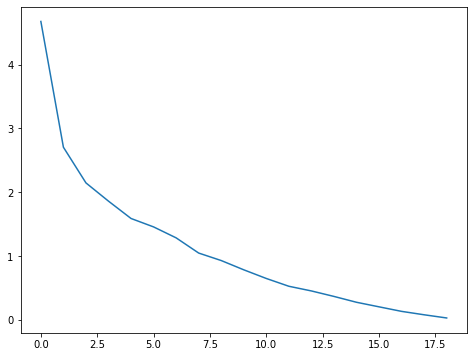

In [28]:
inertia = []

for cluster_count in range(1, malaria_deaths.shape[0]):
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(malaria_deaths.iloc[:, 2:-2])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(inertia)

The elbow in the curve is not very clear but it must be in the range 2-7.

I'll select 3 for this case.

## Plot Geoplot 

Finally, I'll plot these countries on a map and color them based on their cluster.

### KMeans

In [127]:
deaths_data = malaria_deaths.copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = kmeans.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     lat = 'Latitude',
                     lon = 'Longitude',
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')
fig.show()

### MeanShift

In [5]:
deaths_data = malaria_deaths.copy()

meanshift = MeanShift()
meanshift.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = meanshift.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')

fig.show()

### Birch

In [6]:
deaths_data = malaria_deaths.copy()

birch = Birch(n_clusters = 3)
birch.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = birch.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')
fig.show()

### Agglomerative Clustering

In [7]:
deaths_data = malaria_deaths.copy()

birch = AgglomerativeClustering(n_clusters = 3)
birch.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = birch.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')
fig.show()

# Clustering countries by GDP

In [115]:
gdp_data = pd.read_csv("../data/gdp/gdp.csv", skiprows=4)
gdp_data = gdp_data[["Country Name", "Country Code", 
          "2000", "2001", "2002", "2003", 
          "2004", "2005", "2006", "2007",
          "2008", "2009", "2010", "2011", "2012"]]
gdp_data = gdp_data.dropna()
gdp_data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09
2,Angola,AGO,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11
3,Albania,ALB,3.480355e+09,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,1.204422e+10,1.192693e+10,1.289077e+10,1.231983e+10
4,Andorra,AND,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09
5,Arab World,ARB,7.358105e+11,7.240403e+11,7.297961e+11,8.239927e+11,9.650495e+11,1.186105e+12,1.405832e+12,1.639412e+12,2.079914e+12,1.794336e+12,2.106021e+12,2.494062e+12,2.772882e+12


In [116]:
res = gdp_data.merge(malaria_deaths, how = 'inner', left_on = 'Country Code', right_on = 'CountryCode')
res.columns

Index(['Country Name', 'Country Code', '2000_x', '2001_x', '2002_x', '2003_x',
       '2004_x', '2005_x', '2006_x', '2007_x', '2008_x', '2009_x', '2010_x',
       '2011_x', '2012_x', 'Country', 'CountryCode', '2000_y', '2001_y',
       '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y',
       '2009_y', '2010_y', '2011_y', '2012_y', 'Latitude', 'Longitude'],
      dtype='object')

In [122]:
gdp_normalized = pd.DataFrame(normalize(res.iloc[:, 2:15]))
gdp_normalized["Country"] = res["Country Name"]
gdp_normalized["Latitude"] = res["Latitude"]
gdp_normalized["Longitude"] = res["Longitude"]

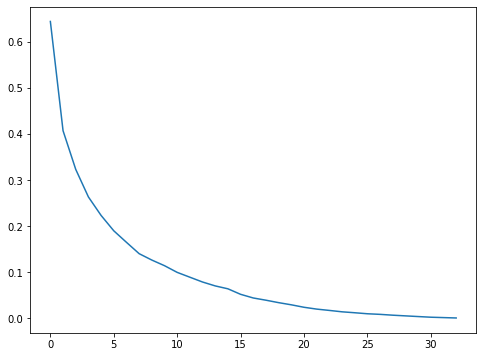

In [123]:
inertia = []

for cluster_count in range(1, gdp_normalized.shape[0]):
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(gdp_normalized.iloc[:, :-3])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(inertia)

In [125]:
gdp_data_copy = gdp_normalized.copy()

kmeans = KMeans(3)
kmeans.fit(gdp_data_copy.iloc[:, :-3])
gdp_data_copy['Cluster'] = kmeans.labels_
gdp_data_copy['Cluster'] = gdp_data_copy['Cluster'].astype('category')


fig = px.scatter_geo(gdp_data_copy, 
                     lat = 'Latitude',
                     lon = 'Longitude',
                     color = "Cluster",
                     text = 'Country',
                     projection = "natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')
fig.show()

In [73]:
gdp_data_copy.iloc[:, 2:]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Latitude,Longitude,Cluster
0,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,12.5,-69.9667,2
1,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,-12.5,18.5000,2
2,3.480355e+09,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,1.204422e+10,1.192693e+10,1.289077e+10,1.231983e+10,41.0,20.0000,2
3,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,42.5,1.6000,2
4,7.358105e+11,7.240403e+11,7.297961e+11,8.239927e+11,9.650495e+11,1.186105e+12,1.405832e+12,1.639412e+12,2.079914e+12,1.794336e+12,2.106021e+12,2.494062e+12,2.772882e+12,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1.849196e+09,2.535334e+09,2.406271e+09,2.790456e+09,3.556757e+09,3.663102e+09,3.846820e+09,4.655899e+09,5.687418e+09,5.653793e+09,5.835874e+09,6.701698e+09,6.499807e+09,NaN,NaN,2
247,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,15.0,48.0000,2
248,1.363613e+11,1.215147e+11,1.154824e+11,1.752569e+11,2.285900e+11,2.577727e+11,2.716385e+11,2.994155e+11,2.867698e+11,2.959365e+11,3.753494e+11,4.164189e+11,3.963327e+11,-29.0,24.0000,2
249,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.345952e+10,2.550306e+10,-15.0,30.0000,2
